In [11]:
## Import Dependencies
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy_financial as npf

In [12]:
## Read in raw FRED data and store in a data frame
#
# Store filepath in a variable
dataFile = "Resources/data2.csv"

# Read in Fred Data
MortgageDataDF = pd.read_csv(dataFile, encoding="ISO-8859-1")

# Convert observation_date to date time format
MortgageDataDF["observation_date"] = pd.to_datetime(MortgageDataDF["observation_date"])

# Convert Mortgage Data to decimal 
MortgageDataDF["MORTGAGE15US"] = MortgageDataDF["MORTGAGE15US"] / 100
MortgageDataDF["MORTGAGE30US"] = MortgageDataDF["MORTGAGE30US"] / 100

MortgageDataDF.head(10)

,observation_date,MORTGAGE15US,MORTGAGE30US,MSPUS,MEHOINUSA672N,DRSFRMACBN
0,1991-08-30,0.0877,0.0915,120000,63530,3.17
1,1991-09-06,0.0879,0.0914,120000,63530,3.17
2,1991-09-13,0.0868,0.0902,120000,63530,3.17
3,1991-09-20,0.0862,0.0895,120000,63530,3.17
4,1991-09-27,0.0859,0.0892,120000,63530,3.17
5,1991-10-04,0.0851,0.0887,120000,63530,3.30
6,1991-10-11,0.0846,0.0882,120000,63530,3.30
7,1991-10-18,0.0845,0.0882,120000,63530,3.30
8,1991-10-25,0.0851,0.0891,120000,63530,3.30
9,1991-11-01,0.0841,0.0878,120000,63530,3.30


In [22]:
## Create additional variables for data analysis
#
# Add Premium Column from 15 to 30 for estimation purposes
MortgageDataDF["MortgagePremium"] = MortgageDataDF["MORTGAGE30US"] / MortgageDataDF["MORTGAGE15US"]
# Add 50 Estimate Rate Column
MortgageDataDF["estimateMORTGAGE50US"] = MortgageDataDF["MORTGAGE30US"] * MortgageDataDF["MortgagePremium"]
# Add Number of Periods Column for calculation estimated monthly payments
MortgageDataDF["nperMORTGAGE15US"] = 15 * 12
MortgageDataDF["nperMORTGAGE30US"] = 30 * 12
MortgageDataDF["nperMORTGAGE50US"] = 50 * 12
# Calculate estimated montly payments for each of the mortgage lengths and rates
MortgageDataDF["15YearPayment"] = -npf.pmt(MortgageDataDF["MORTGAGE15US"] / 12, MortgageDataDF["nperMORTGAGE15US"], MortgageDataDF['MSPUS'])
MortgageDataDF["30YearPayment"] = -npf.pmt(MortgageDataDF["MORTGAGE30US"] / 12, MortgageDataDF["nperMORTGAGE30US"], MortgageDataDF['MSPUS'])
MortgageDataDF["50YearPayment"] = -npf.pmt(MortgageDataDF["estimateMORTGAGE50US"] / 12, MortgageDataDF["nperMORTGAGE50US"], MortgageDataDF['MSPUS'])
# Calc Total Cost of each mortgage
MortgageDataDF["15YearTotal"] = MortgageDataDF["15YearPayment"] * MortgageDataDF["nperMORTGAGE15US"]
MortgageDataDF["30YearTotal"] = MortgageDataDF["30YearPayment"] * MortgageDataDF["nperMORTGAGE30US"]
MortgageDataDF["50YearTotal"] = MortgageDataDF["50YearPayment"] * MortgageDataDF["nperMORTGAGE50US"]

# Reorganizing the Columns in the large data table
MortgageDataDF = MortgageDataDF[["observation_date","MSPUS","MEHOINUSA672N","DRSFRMACBN",
                              "MORTGAGE15US","MORTGAGE30US","MortgagePremium","estimateMORTGAGE50US",
                              "nperMORTGAGE15US","15YearPayment","15YearTotal",
                              "nperMORTGAGE30US","30YearPayment","30YearTotal",
                              "nperMORTGAGE50US","50YearPayment","50YearTotal",]]


MortgageDataDF.head(10)

,observation_date,MSPUS,MEHOINUSA672N,DRSFRMACBN,MORTGAGE15US,MORTGAGE30US,MortgagePremium,estimateMORTGAGE50US,nperMORTGAGE15US,15YearPayment,15YearTotal,nperMORTGAGE30US,30YearPayment,30YearTotal,nperMORTGAGE50US,50YearPayment,50YearTotal
0,1991-08-30,120000,63530,3.17,0.0877,0.0915,1.043330,0.095465,180,1200.756113,216136.100313,360,978.526714,352269.616876,600,962.941468,577764.880755
1,1991-09-06,120000,63530,3.17,0.0879,0.0914,1.039818,0.095039,180,1202.174680,216391.442432,360,977.659678,351957.483954,600,958.829254,575297.552249
2,1991-09-13,120000,63530,3.17,0.0868,0.0902,1.039171,0.093733,180,1194.382906,214988.923004,360,967.274517,348218.826060,600,946.213726,567728.235398
3,1991-09-20,120000,63530,3.17,0.0862,0.0895,1.038283,0.092926,180,1190.143527,214225.834793,360,961.233093,346043.913562,600,938.432005,563059.202986
4,1991-09-27,120000,63530,3.17,0.0859,0.0892,1.038417,0.092627,180,1188.026671,213844.800867,360,958.647692,345113.169275,600,935.545081,561327.048485
5,1991-10-04,120000,63530,3.30,0.0851,0.0887,1.042303,0.092452,180,1182.390982,212830.376826,360,954.343768,343563.756483,600,933.864094,560318.456339
6,1991-10-11,120000,63530,3.30,0.0846,0.0882,1.042553,0.091953,180,1178.875529,212197.595192,360,950.046229,342016.642344,600,929.058035,557434.821245
7,1991-10-18,120000,63530,3.30,0.0845,0.0882,1.043787,0.092062,180,1178.173072,212071.152918,360,950.046229,342016.642344,600,930.105624,558063.374226
8,1991-10-25,120000,63530,3.30,0.0851,0.0891,1.047004,0.093288,180,1182.390982,212830.376826,360,957.786399,344803.103603,600,941.919208,565151.524514
9,1991-11-01,120000,63530,3.30,0.0841,0.0878,1.043995,0.091663,180,1175.365358,211565.764482,360,946.612825,340780.616978,600,926.263138,555757.882941


In [14]:
## Data Summary Statistics
#
MortgageDataDF.describe().round(2)

,observation_date,MSPUS,MEHOINUSA672N,DRSFRMACBN,MORTGAGE15US,MORTGAGE30US,MortgagePremium,estimateMORTGAGE50US,nperMORTGAGE15US,15YearPayment,15YearTotal,nperMORTGAGE30US,30YearPayment,30YearTotal,nperMORTGAGE50US,50YearPayment,50YearTotal
count,1786,1786.00,1786.00,1786.00,1786.00,1786.00,1786.00,1786.00,1786.0,1786.00,1786.00,1786.0,1786.00,1786.00,1786.0,1786.00,1786.00
mean,2008-10-05 20:11:01.142217216,246097.31,72228.54,3.76,0.05,0.06,1.13,0.06,180.0,1935.60,348407.77,360.0,1403.45,505240.60,600.0,1337.55,802530.36
min,1991-08-30 00:00:00,119500.00,62700.00,1.40,0.02,0.03,1.03,0.03,180.0,1093.08,196755.19,360.0,822.88,296235.20,600.0,783.58,470145.27
25%,2000-03-18 18:00:00,165300.00,68420.00,2.01,0.03,0.04,1.07,0.05,180.0,1479.94,266389.87,360.0,1093.17,393539.51,600.0,1032.27,619361.06
50%,2008-10-05 12:00:00,233100.00,70520.00,2.37,0.06,0.06,1.11,0.07,180.0,1755.40,315972.61,360.0,1264.49,455215.50,600.0,1197.97,718780.58
75%,2017-04-25 06:00:00,313100.00,76710.00,4.15,0.07,0.07,1.19,0.08,180.0,2187.11,393679.54,360.0,1505.04,541815.10,600.0,1393.73,836235.96
max,2025-11-13 00:00:00,442600.00,83730.00,11.36,0.09,0.09,1.35,0.10,180.0,3845.66,692218.36,360.0,3043.56,1095682.61,600.0,3086.12,1851674.21
std,NaN,92825.44,6049.68,2.86,0.02,0.02,0.08,0.02,0.0,670.13,120623.61,0.0,496.79,178844.68,0.0,502.77,301663.10


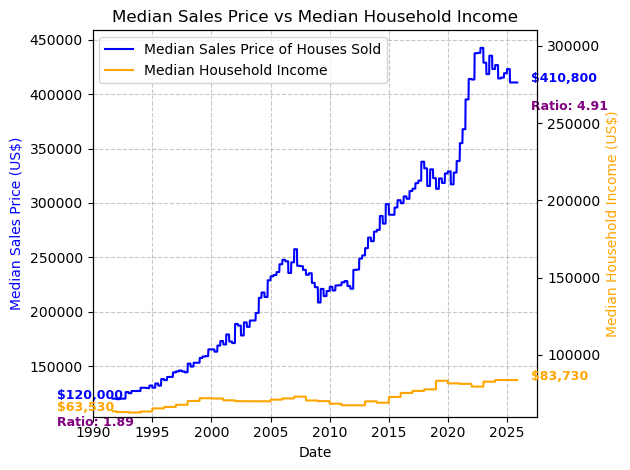

In [15]:
## Visualization 1 - Raw Data Median Sales Price vs Household income
#
# Create second Y-axis
fig, ax1 = plt.subplots()
# First line: Median Sales Price
sns.lineplot(data=MortgageDataDF, x="observation_date", y="MSPUS", ax=ax1, color="blue")
ax1.set_ylabel("Median Sales Price (US$)",color="Blue")
ax1.tick_params(axis='y')

# Create second Y-axis
ax2 = ax1.twinx()
# Second line: Median Household Income (disable auto legend)
sns.lineplot(data=MortgageDataDF, x="observation_date", y="MEHOINUSA672N", ax=ax2, color="orange")
ax2.set_ylabel("Median Household Income (US$)",color="Orange")
ax2.tick_params(axis='y')
ax2.set_ylim(60000, 310000) #Set to demonstrate that MSP outpaced MHI significantly

# Get first values
first_date = MortgageDataDF["observation_date"].iloc[0]
first_price = MortgageDataDF["MSPUS"].iloc[0]
first_income = MortgageDataDF["MEHOINUSA672N"].iloc[0]
# Annotate on MSPUS
ax1.annotate(f"${first_price:,.0f}",
             xy=(first_date, first_price),
             xytext=(-40, 0),  # offset to the left
             textcoords="offset points",
             color="blue",
             fontsize=9,
             fontweight="bold")
# Annotate on MEHOINUSA672N
ax2.annotate(f"${first_income:,.0f}",
             xy=(first_date, first_income),
             xytext=(-40, 0),
             textcoords="offset points",
             color="orange",
             fontsize=9,
             fontweight="bold")


# Get last values
last_date = MortgageDataDF["observation_date"].iloc[-1]
last_price = MortgageDataDF["MSPUS"].iloc[-1]
last_income = MortgageDataDF["MEHOINUSA672N"].iloc[-1]
# Annotate on MSPUS
ax1.annotate(f"${last_price:,.0f}",
             xy=(last_date, last_price),
             xytext=(10, 0),
             textcoords="offset points",
             color="blue",
             fontsize=9,
             fontweight="bold")
# Annotate on MEHOINUSA672N
ax2.annotate(f"${last_income:,.0f}",
             xy=(last_date, last_income),
             xytext=(10, 0),
             textcoords="offset points",
             color="orange",
             fontsize=9,
             fontweight="bold")

# Get ratios for first and last values
ratio_first = first_price / first_income
ratio_last = last_price / last_income
# Annotate ratio at first point
ax1.annotate(f"Ratio: {ratio_first:.2f}",
             xy=(first_date, first_price),
             xytext=(-40, -20),
             textcoords="offset points",
             color="purple",
             fontsize=9,
             fontweight="bold")
# Annotate ratio at last point
ax1.annotate(f"Ratio: {ratio_last:.2f}",
             xy=(last_date, last_price),
             xytext=(10, -20),  # offset slightly below
             textcoords="offset points",
             color="purple",
             fontsize=9,
             fontweight="bold")


# Title and X-axis formatting
ax1.set_title("Median Sales Price vs Median Household Income")
ax1.set_xlabel("Date")
ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Grid and layout
ax1.grid(True, which="major", linestyle="--", alpha=0.7)
fig.tight_layout()

# Combine legends
lines_1, labels_1 = ax1.get_lines(), ["Median Sales Price of Houses Sold"]
lines_2, labels_2 = ax2.get_lines(), ["Median Household Income"]
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()

In [16]:
# Calculating Housing Affordability Index (HAI)
#
##To calculate the HAI Need:
# Median Family income - MEHOINUSA672N
# Qualifying income
	# QI = Monthly median mortgage payment * 4 * 12
#		Note that the 4 here is following the 25% rule, citing that your mortgage payment shouldn't be more than 25% your income
	# > 1 means affordable, < 1 means unaffordable

#Calculating the HAI for mortgages over time

# Copy over the Key column
df_monthly_payment_HAI = MortgageDataDF.loc[:, ["observation_date"]].copy()
# Create a Year Variable to help with visualisations

# Calculating HAI is as follows
#     Calc1 is for the qualified income calculation
#     Calc2 is for the Housing Affordability Index value
#     Calc3 is a quick reference column

# HAI Analysis 15 Year Mortgage
df_monthly_payment_HAI["qual_income_15"] = ((MortgageDataDF["15YearPayment"]*12)/.25).round(2)
df_monthly_payment_HAI["HAI_15"] = (((MortgageDataDF["MEHOINUSA672N"])/df_monthly_payment_HAI["qual_income_15"])*1).round(2)
df_monthly_payment_HAI["affordable_15"] = df_monthly_payment_HAI["HAI_15"].apply(lambda x: "Yes" if x >=1 else "No")
# HAI Analysis 30 Year Mortgage
df_monthly_payment_HAI["qual_income_30"] = ((MortgageDataDF["30YearPayment"]*12)/.25).round(2)
df_monthly_payment_HAI["HAI_30"] = (((MortgageDataDF["MEHOINUSA672N"])/df_monthly_payment_HAI["qual_income_30"])*1).round(2)
df_monthly_payment_HAI["affordable_30"] = df_monthly_payment_HAI["HAI_30"].apply(lambda x: "Yes" if x >=1 else "No")
# HAI Analysis 50 Year Mortgage
df_monthly_payment_HAI["qual_income_50"] = ((MortgageDataDF["50YearPayment"]*12)/.25).round(2)
df_monthly_payment_HAI["HAI_50"] = (((MortgageDataDF["MEHOINUSA672N"])/df_monthly_payment_HAI["qual_income_50"])*1).round(2)
df_monthly_payment_HAI["affordable_50"] = df_monthly_payment_HAI["HAI_50"].apply(lambda x: "Yes" if x >=1 else "No")

# Creat a helper column with just an value at the threshold of affordability
df_monthly_payment_HAI["Affordability_Threshold"] = 1

df_monthly_payment_HAI.head(10)


,observation_date,qual_income_15,HAI_15,affordable_15,qual_income_30,HAI_30,affordable_30,qual_income_50,HAI_50,affordable_50,Affordability_Threshold
0,1991-08-30,57636.29,1.10,Yes,46969.28,1.35,Yes,46221.19,1.37,Yes,1
1,1991-09-06,57704.38,1.10,Yes,46927.66,1.35,Yes,46023.80,1.38,Yes,1
2,1991-09-13,57330.38,1.11,Yes,46429.18,1.37,Yes,45418.26,1.40,Yes,1
3,1991-09-20,57126.89,1.11,Yes,46139.19,1.38,Yes,45044.74,1.41,Yes,1
4,1991-09-27,57025.28,1.11,Yes,46015.09,1.38,Yes,44906.16,1.41,Yes,1
5,1991-10-04,56754.77,1.12,Yes,45808.50,1.39,Yes,44825.48,1.42,Yes,1
6,1991-10-11,56586.03,1.12,Yes,45602.22,1.39,Yes,44594.79,1.42,Yes,1
7,1991-10-18,56552.31,1.12,Yes,45602.22,1.39,Yes,44645.07,1.42,Yes,1
8,1991-10-25,56754.77,1.12,Yes,45973.75,1.38,Yes,45212.12,1.41,Yes,1
9,1991-11-01,56417.54,1.13,Yes,45437.42,1.40,Yes,44460.63,1.43,Yes,1


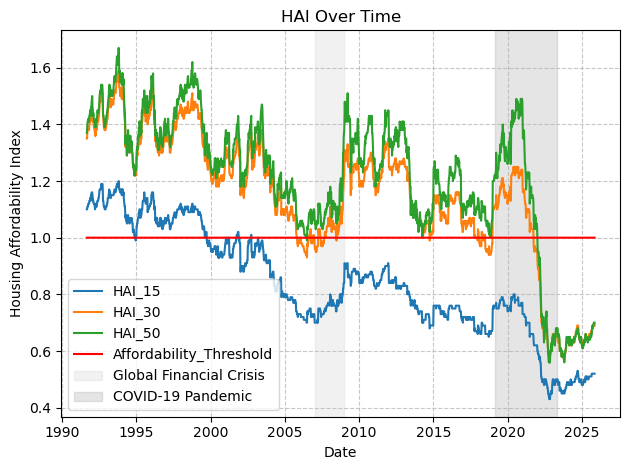

In [17]:
## Visualization 2 - Housing Affordability Index (HAI)
#
#Building the lines HAI threshold
ax = sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_15", label="HAI_15")
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_30", label="HAI_30")
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_50", label="HAI_50")
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="Affordability_Threshold", label="Affordability_Threshold", color='r')

#Adding labels
ax.set_title("HAI Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Housing Affordability Index")

#Formatting 
ax.grid(True, which="major", linestyle="--", alpha=0.7)
# Show ticks yearly; format as 4-digit year
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# Subprime Mortgage Crisis shader
plt.axvspan(pd.to_datetime("2007-01-01"), pd.to_datetime("2009-01-01"),
            color="lightgray", alpha=0.3, label="Global Financial Crisis")
# COVID-19 Pandemic shader
plt.axvspan(pd.to_datetime("2019-03-11"), pd.to_datetime("2023-05-03"),
            color="darkgray", alpha=0.3, label="COVID-19 Pandemic")

plt.tight_layout()
plt.legend()
plt.show()

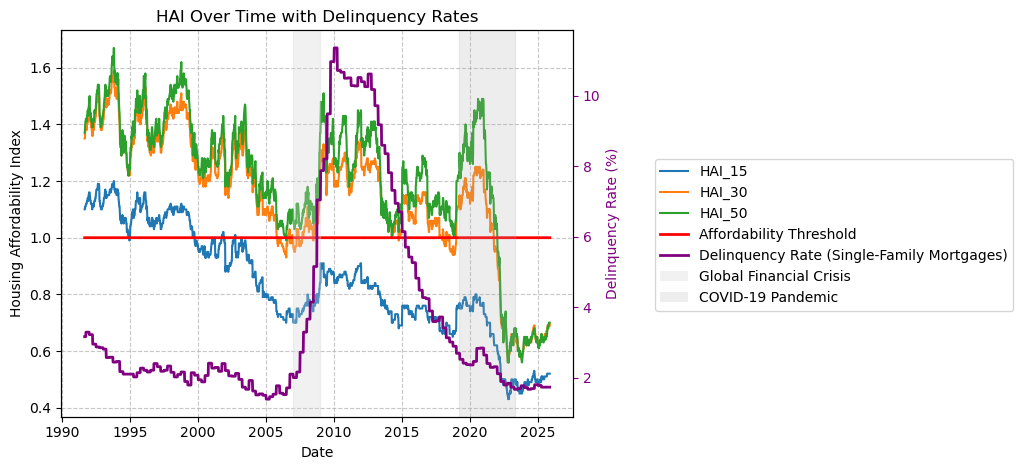

In [18]:
## Visualization 2 - Housing Affordability Index (HAI) with delinquency rates
#
# Create first Y-axis
ax = sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_15", label="HAI_15", legend=False)
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_30", label="HAI_30", legend=False)
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="HAI_50", label="HAI_50", legend=False)
sns.lineplot(data=df_monthly_payment_HAI, x="observation_date", y="Affordability_Threshold", label="Affordability Threshold", color="r", linewidth=2, legend=False)
# Labels for first axis
ax.set_title("HAI Over Time with Delinquency Rates")
ax.set_xlabel("Date")
ax.set_ylabel("Housing Affordability Index")
# Formatting first axis
ax.grid(True, which="major", linestyle="--", alpha=0.7)
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Create second Y-axis
ax2 = ax.twinx()
delinq_color = "purple"
delinq_line = sns.lineplot(data=MortgageDataDF, x="observation_date", y="DRSFRMACBN", ax=ax2, color=delinq_color, label="Delinquency Rate (Single-Family Mortgages)", linewidth=2, legend=False)
ax2.set_ylabel("Delinquency Rate (%)", color=delinq_color)
ax2.tick_params(axis="y", colors=delinq_color)

# Shaded Periods
gfc_span = plt.axvspan(pd.to_datetime("2007-01-01"), pd.to_datetime("2009-01-01"),
                       color="lightgray", alpha=0.3)
covid_span = plt.axvspan(pd.to_datetime("2019-03-11"), pd.to_datetime("2023-05-03"),
                         color="darkgray", alpha=0.2)

# Remove any axis-level legends
for a in (ax, ax2):
    leg = a.get_legend()
    if leg is not None:
        leg.remove()
# Collect handles/labels from both axes and deduplicate by label
handles, labels = [], []
for a in (ax, ax2):
    h, l = a.get_legend_handles_labels()
    for hh, ll in zip(h, l):
        if ll not in labels:
            handles.append(hh)
            labels.append(ll)

# Add shaded patches to legend
from matplotlib.patches import Patch
gfc_patch   = Patch(facecolor="lightgray", edgecolor="none", alpha=0.3, label="Global Financial Crisis")
covid_patch = Patch(facecolor="darkgray", edgecolor="none", alpha=0.2, label="COVID-19 Pandemic")
handles += [gfc_patch, covid_patch]
labels  += ["Global Financial Crisis", "COVID-19 Pandemic"]
# Place the legend outside on the right
fig = plt.gcf()
# Make room on the right side for the legend
plt.subplots_adjust(right=0.80)
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True)

plt.tight_layout()
plt.show()

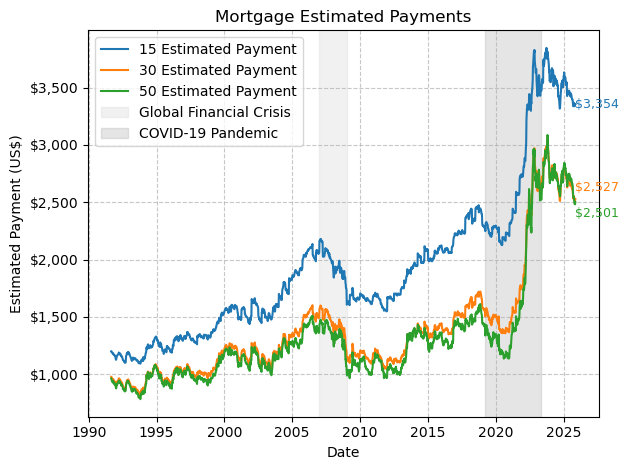

In [19]:
# Visualization 3 - Estimated Monthly Payments
#
# Building the lines for estimated mortgage payments
ax = sns.lineplot(data=MortgageDataDF, x="observation_date", y="15YearPayment", label="15 Estimated Payment")
sns.lineplot(data=MortgageDataDF, x="observation_date", y="30YearPayment", label="30 Estimated Payment")
sns.lineplot(data=MortgageDataDF, x="observation_date", y="50YearPayment", label="50 Estimated Payment")

# Adding labels
ax.set_title("Mortgage Estimated Payments")
ax.set_xlabel("Date")
ax.set_ylabel("Estimated Payment (US$)")

# Formatting
ax.grid(True, which="major", linestyle="--", alpha=0.7)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Subprime Mortgage Crisis shader
plt.axvspan(pd.to_datetime("2007-01-01"), pd.to_datetime("2009-01-01"),
            color="lightgray", alpha=0.3, label="Global Financial Crisis")
# COVID-19 Pandemic shader
plt.axvspan(pd.to_datetime("2019-03-11"), pd.to_datetime("2023-05-03"),
            color="darkgray", alpha=0.3, label="COVID-19 Pandemic")

# Annotate last values for each line with slight vertical offsets
last_date = MortgageDataDF["observation_date"].iloc[-1]
offsets = [0, 100, -100]  # Adjust these values to separate labels (in y-axis units)

for (col, label), offset in zip([("15YearPayment", "15 Estimated Payment"),
                                 ("30YearPayment", "30 Estimated Payment"),
                                 ("50YearPayment", "50 Estimated Payment")], offsets):
    last_value = MortgageDataDF[col].iloc[-1]
    ax.text(last_date, last_value + offset, f"${last_value:,.0f}",
            color=ax.get_lines()[["15YearPayment","30YearPayment","50YearPayment"].index(col)].get_color(),
            fontsize=9, ha='left', va='center')

plt.tight_layout()
plt.legend()
plt.show()


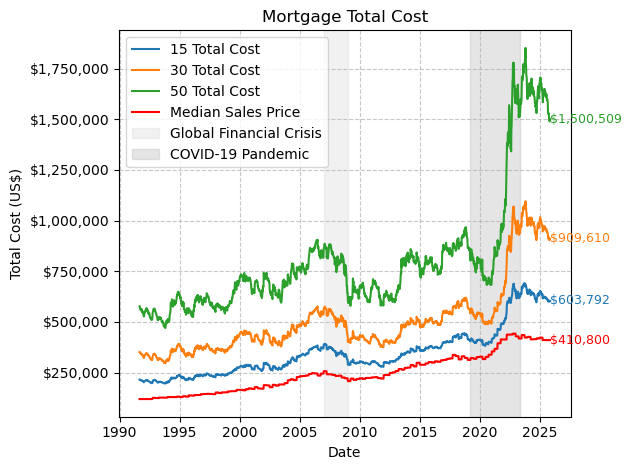

In [20]:
## Visualization 4 - Total cost of mortgages
#
#Building the lines Total cost of mortgage
ax = sns.lineplot(data=MortgageDataDF, x="observation_date", y="15YearTotal", label="15 Total Cost")
sns.lineplot(data=MortgageDataDF, x="observation_date", y="30YearTotal", label="30 Total Cost")
sns.lineplot(data=MortgageDataDF, x="observation_date", y="50YearTotal", label="50 Total Cost")
sns.lineplot(data=MortgageDataDF, x="observation_date", y="MSPUS", label="Median Sales Price", color="red")

#Adding labels
ax.set_title("Mortgage Total Cost")
ax.set_xlabel("Date")
ax.set_ylabel("Total Cost (US$)")

#Formatting 
ax.grid(True, which="major", linestyle="--", alpha=0.7)
# Format y-axis as full dollars with commas
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
# Show ticks yearly; format as 4-digit year
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# Subprime Mortgage Crisis shader
plt.axvspan(pd.to_datetime("2007-01-01"), pd.to_datetime("2009-01-01"),
            color="lightgray", alpha=0.3, label="Global Financial Crisis")
# COVID-19 Pandemic shader
plt.axvspan(pd.to_datetime("2019-03-11"), pd.to_datetime("2023-05-03"),
            color="darkgray", alpha=0.3, label="COVID-19 Pandemic")

# Annotate last values for each line
last_date = MortgageDataDF["observation_date"].iloc[-1]
for col, label in [("15YearTotal", "15 Year Total Cost"),
                   ("30YearTotal", "30 Year Total Cost"),
                   ("50YearTotal", "50 Year Total Cost"),
                   ("MSPUS", "Median Sales Price")]:
    last_value = MortgageDataDF[col].iloc[-1]
    ax.text(last_date, last_value, f"${last_value:,.0f}", 
            color=ax.get_lines()[["15YearTotal","30YearTotal","50YearTotal","MSPUS"].index(col)].get_color(),
            fontsize=9, ha='left', va='center')


plt.tight_layout()
plt.legend()
plt.show()

In [10]:
# Data Sources
#
# MSPUS - Median Sales Price of Houses Sold for the United States
# https://fred.stlouisfed.org/series/MSPUS 
# MEHOINUSA672N - Real Median Household Income in the United States
# https://fred.stlouisfed.org/series/MEHOINUSA672N 
# MORTGAGE15US - 15-Year Fixed Rate Mortgage Average in the US
# https://fred.stlouisfed.org/series/MORTGAGE15US 
# MORTGAGE30US - 30-Year Fixed Rate Mortgage Average in the US 
# https://fred.stlouisfed.org/series/MORTGAGE30US 
# DRSFRMACBN - Delinquency Rate on Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks 
# https://fred.stlouisfed.org/series/DRSFRMACBN 
#
# HAI was selected after consulting the National Association of Realtors site here:
# https://www.nar.realtor/research-and-statistics/housing-statistics/housing-affordability-index
# The calculation for HAI is found here:
# https://www.nar.realtor/research-and-statistics/housing-statistics/housing-affordability-index/methodology